# The Spark Foudation Intership Task 1
## By Khaled Sherif

## Supervised Learning Prediction
The Task is to predict the percentage of an student based on the no. of study hours.<br>
This is a simple Linear Regression task as it involves 2 variables.<br>
Dataset can be found here https://bit.ly/2HxiGGJ

## Steps performed to create the Supervised model
<ul>
<li>Reading and exploring the data</li>
<li>Preparing the data</li>
<li>Evaluating model performance with CV (on the training data)</li>
<li>Training and test the Algorithm on test data</li>
<li>Making Predictions</li>
<li>Evaluating the final model</li>
</ul>

In [2]:
 # Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics  
%matplotlib inline

## **Reading and exploring the data**

In [3]:
# Reading data from remote url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print(f"Data imported successfully, dataset has {data.shape[0]} rows and {data.shape[1]} columns")
data.head()

Data imported successfully, dataset has 25 rows and 2 columns


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Checking for missing data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Lets see how data features correlate to each other alongside their distributions to find if there is any relationship between the data.

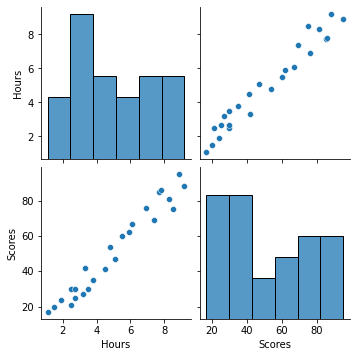

In [6]:
# Plotting data scatter plots and distributions
sb.pairplot(data);

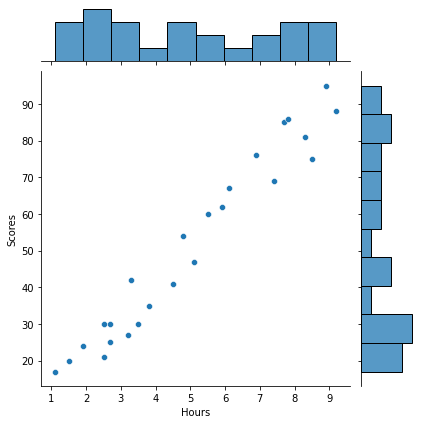

In [7]:
# Plotting data scatter plot compared to feature distributions in one graph
g = sb.jointplot(x='Hours', y='Scores', data=data,  marginal_kws=dict(bins=10))

From the 2 graphs above its obviously clear that there is a strong correlation between numbers of hours studied and percentage of scores.

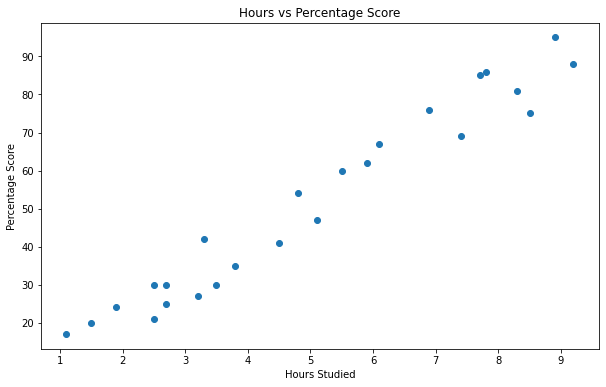

In [8]:
plt.figure(figsize=(10, 6))
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.scatter(data.iloc[:, :-1].values, data.iloc[:, 1].values );

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Splitting the data into training dataset(80%) and test dataset(20%) and declaring model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)
# Decaring model
regressor = LinearRegression()  

## **Evaluating model performance**


Since our data is limited(25 rows) before going further and training our model its wise to first train and test our model on the training data and evaluate its performance using cross-validation by splitting the training data into different splits and training and testing the model on each split and plot the model (line) in respect to data to see how the model performs and fits the unseen data. and then test it on the test dataset.

In [11]:
# Preparing training dataset for cross-validation
train_dataset = pd.DataFrame({'Hours': X_train.flatten(), 'Scores': y_train}, columns=['Hours', 'Scores'])
train_dataset.head()

,Hours,Scores
0,3.8,35
1,1.9,24
2,7.8,86
3,6.9,76
4,1.1,17


In [12]:
def plot_model(model, label):
    # Plotting the regression line
    line = regressor.coef_*X+regressor.intercept_

    # Plotting for the test data
    plt.plot(X, line, label=f'{label}');
    plt.legend() 

In [15]:
    def cross_validation(df, splits, test_size=0.2):
        """
        Split data into number of folds, train and test a model on each split,
        print the MSE of each model and plot its line with the scatter of the whole data.

        parameters:
        arg1 (df): dataset
        arg2 (splits): number of splits
        arg2 (test_size): size of test data in each split

        """
        #plotting scatter for the whole data
        plt.figure(figsize=(10, 6))
        plt.title('Hours vs Percentage Score')  
        plt.xlabel('Hours Studied')  
        plt.ylabel('Percentage Score') 
        plt.scatter(X, y);

        n_fold = 1
        mae_scores = []
        r2_scores = []
        #Splitting the dataset arg into different n splits 
        rs = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=0)
        for train_indices, test_indices in rs.split(df):
            #fitting model on each split
            print('fold {}/5......'.format(n_fold)) 
            x_train = X_train[train_indices, ...]
            Y_train = y_train[train_indices, ...]
            regressor.fit(x_train, Y_train)
            #plotting model line on the scatter plot of the data
            plot_model(regressor, f"model{n_fold}")
            #evaluating model performance
            x_test = X_train[test_indices, ...]
            y_test = y_train[test_indices, ...]
            y_pred = regressor.predict(x_test)
            mae_score = metrics.mean_absolute_error(y_test, y_pred)
            r2_score = metrics.r2_score(y_test, y_pred)
            df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
            #printing model scores and predictions
            print('Mean Absolute Error:', mae_score )
            print('R2 score:', r2_score)
            print(f'\n\n{df}\n\n') 
            mae_scores.append(metrics.mean_absolute_error(y_test, y_pred))
            r2_scores.append(r2_score)
            n_fold += 1
        #printing model overall accuracy and scores
        print('\n\nAvg mae of all CV models:', 
                sum(mae_scores)/len(mae_scores)) 
        print('Avg R2 score of all CV models:', 
                sum(r2_scores)/len(r2_scores))

fold 1/5......
Mean Absolute Error: 4.200095861057856
R2 score: 0.9773744633433542


   Actual  Predicted
0      95  90.243233
1      24  20.941891
2      41  46.682390
3      81  84.303118


fold 2/5......
Mean Absolute Error: 4.99541447880361
R2 score: 0.9654772632778753


   Actual  Predicted
0      30  36.664650
1      24  21.075932
2      95  89.276576
3      54  49.330484


fold 3/5......
Mean Absolute Error: 6.579307994264627
R2 score: 0.821854254960705


   Actual  Predicted
0      75  88.149014
1      60  57.674435
2      25  29.231495
3      47  53.611158


fold 4/5......
Mean Absolute Error: 6.1947955250775735
R2 score: 0.9243871276754705


   Actual  Predicted
0      95  87.773714
1      35  39.549892
2      60  55.624499
3      86  77.372497


fold 5/5......
Mean Absolute Error: 6.075014416012013
R2 score: 0.9245877319690593


   Actual  Predicted
0      42  33.879482
1      24  19.922972
2      86  78.739693
3      41  45.842205




Avg mae of all CV models: 5.60892565504

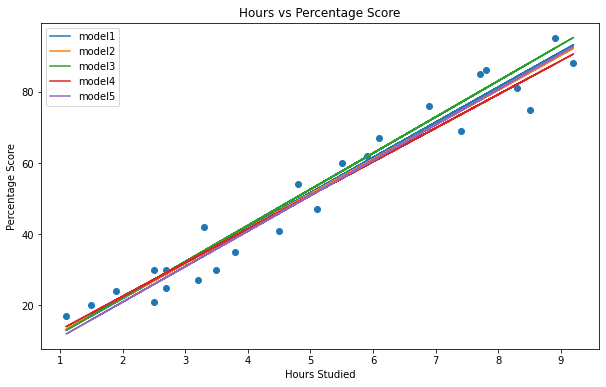

In [16]:
#performing cross-validation
cross_validation(train_dataset, 5, test_size=0.2)

An avg MAE score of 5.6 and overall avg accuracy of 0.92 is pretty good scores for a linear model, otherwise the model will show a slight increase in the performance after training it on the whole training dataset and testing it on the test data.

## **Training and test the Algorithm on test data**
Now is finally the time to train and test our algorithm.

In [17]:
#fitting model
regressor.fit(X_train, y_train) 
print("Complete..")

Complete..


## **Making Predictions**
Its time to make some predictions, since we trained our model

In [18]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## **Evaluating the final model**

Now lets evaluate the performance of our final model and compare how well it performs on the unseen data dataset. we will evaluate it by the mean square error and r2.

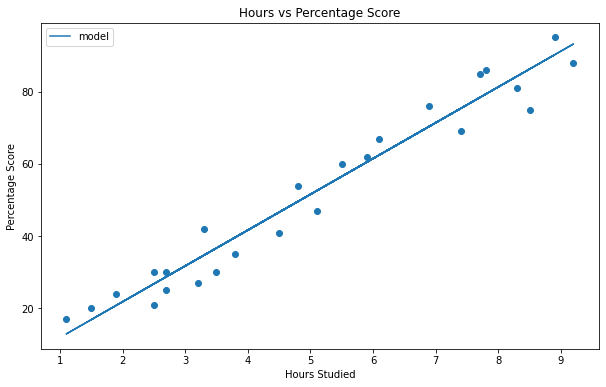

In [19]:
# Lets firstly fit the model line on the data
plt.figure(figsize=(10, 6))
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.scatter(X, y);
plot_model(regressor, 'model')

In [20]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
#Evaluating model metrices(MAE and r2)
from sklearn import metrics
mae_score = metrics.mean_absolute_error(y_test, y_pred)
r2_score = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae_score,
        '\nR2 score:', r2_score)

Mean Absolute Error: 4.183859899002975 
R2 score: 0.9454906892105355


In [22]:
# As a final step lets use the model to predict the score of a stdent wh studied 925 hours
hours = 9.25
own_pred = regressor.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535
